# Projeto 1 - Ciência dos Dados

Nome: Fernando Giuseppe Avila Beltramo

## Pergunta (s) a ser respondida

Q1: Países membros do Digital 9 tiveram aumento notável em usuários da internet?

Q2: Países membros do Digital 9 investiram mais em educação do que países não-membros?

## Explicação da hipótese e mecanismo

O Digital 9 (Digital 5 até 2018) é uma rede colaborativa de E-Governments com o objetivo comum de melhorar a vida dos cidadãos através do emprego de tecnologia digital. Pode-se inferir que países membros deste grupo possuam níveis de acessibilidade à Internet elevados.

>Mais sobre o Digital 9: https://www.digital.govt.nz/digital-government/international-partnerships/the-digital-9/

>Mais sobre o Digital 5: https://www.digital.govt.nz/digital-government/international-partnerships/the-digital-9/d5-summit/

>Digital 5 Charter: https://www.digital.govt.nz/dmsdocument/12-d5-charter/html

## Bases de dados usadas

Pessoas usando a Internet (%):

>Site - https://data.worldbank.org/indicator/IT.NET.USER.ZS

>Excel - http://api.worldbank.org/v2/en/indicator/IT.NET.USER.ZS?downloadformat=excel

Gasto em Educação (%):

>Site - https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS

>Excel - http://api.worldbank.org/v2/en/indicator/SE.XPD.TOTL.GD.ZS?downloadformat=excel

## Leitura dos Arquivos e limpeza de banco de dados

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
digital_5 = ["Estonia", "Israel", "New Zealand", "United Kingdom", "Korea, Rep."]
not_a_country = ["Arab World", "Central Europe and the Baltics", "Caribbean small states", "East Asia & Pacific (excluding high income)", "Early-demographic dividend", "East Asia & Pacific",
                "Europe & Central Asia (excluding high income)", "Europe & Central Asia", "Euro area", "European Union", "Fragile and conflict affected situations", "High income",
                "Heavily indebted poor countries (HIPC)", "IBRD only", "IDA & IBRD total", "IDA total", "IDA blend", "IDA only", "Not classified", "Latin America & Caribbean (excluding high income)",
                "Latin America & Caribbean", "Least developed countries: UN classification", "Low income", "Lower middle income", "Low & middle income", "Late-demographic dividend",
                "Middle East & North Africa", "Middle income", "Middle East & North Africa (excluding high income)", "OECD members", "Other small states", "Pre-demographic dividend",
                "Pacific island small states", "Post-demographic dividend", "Sub-Saharan Africa (excluding high income)", "Small states", "East Asia & Pacific (IDA & IBRD countries)",
                "Europe & Central Asia (IDA & IBRD countries)", "Latin America & the Caribbean (IDA & IBRD countries)", "Middle East & North Africa (IDA & IBRD countries)",
                "South Asia (IDA & IBRD)", "Sub-Saharan Africa (IDA & IBRD countries)", "Upper middle income", "World", "North America", "South Asia", "Sub-Saharan Africa"]

# Número de pessoas usando a Internet

Pode-se verificar que cada linha é um país e em cada coluna temos um ano

In [138]:
internet_users_filename = "Individual_usign_internet.xls"
internet_users_raw = pd.read_excel(internet_users_filename, sheet_name="Data", skiprows=3)

internet_users_v1 = internet_users_raw.set_index("Country Name")
internet_users_v1.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1 , inplace=True)
internet_users_v1.drop(not_a_country, axis=0 , inplace=True)

internet_users_v1.dropna(axis=0, how="all", inplace=True)
internet_users_v1.dropna(axis=1, how="all", inplace=True)
internet_users_v2 = internet_users_v1.interpolate(axis=0, method ='linear', limit_direction ='both')

internet_users_v2.drop(internet_users_v2.columns[0:18], axis=1, inplace=True)

internet_users_v2.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.0,1.097204,0.002993,0.029527,0.043706,0.011169,2.768383,0.005674,0.018454,4.506179,...,52.00,58.00,62.0,69.0,74.000000,78.9,83.78,88.661227,93.542454,97.170000
Afghanistan,0.0,1.097204,0.002993,0.029527,0.043706,0.011169,1.384579,0.005674,0.018454,2.289072,...,1.84,3.55,4.0,5.0,5.454545,5.9,7.00,8.260000,10.595726,11.447688
Angola,0.0,1.097204,0.002993,0.029527,0.043706,0.011169,0.000776,0.005674,0.018454,0.071964,...,1.90,2.30,2.8,3.1,6.500000,8.9,10.20,12.400000,13.000000,14.339079
Albania,0.0,1.097204,0.002993,0.029527,0.043706,0.011169,0.032197,0.048594,0.065027,0.081437,...,23.86,41.20,45.0,49.0,54.655959,57.2,60.10,63.252933,66.363445,71.847041
Andorra,0.0,1.097204,0.002993,0.029527,0.043706,0.057054,1.526601,3.050175,6.886209,7.635686,...,70.04,78.53,81.0,81.0,86.434425,94.0,95.90,96.910000,97.930637,98.871436


# Gasto em Educação

Pode-se verificar que cada linha é um país e em cada coluna temos um ano

In [139]:
gov_exp_education_filename = "Government_expenditure_on_education.xls"
gov_exp_education_raw = pd.read_excel(gov_exp_education_filename, sheet_name="Data", skiprows=3)

gov_exp_education_v1 = gov_exp_education_raw.set_index("Country Name")
gov_exp_education_v1.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1 , inplace=True)
gov_exp_education_v1.drop(not_a_country, axis=0 , inplace=True)

gov_exp_education_v1.dropna(axis=0, how="all", inplace=True)
gov_exp_education_v1.dropna(axis=1, how="all", inplace=True)
gov_exp_education_v2 = gov_exp_education_v1.interpolate(axis=0, method ='linear', limit_direction ='both')

gov_exp_education_v2.head(5)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,1.45809,1.160360,1.117180,1.42788,1.92352,1.30332,1.16564,1.71984,1.93555,1.739810,...,5.924670,6.712490,6.03687,6.549060,6.808060,6.162930,6.479060,6.143220,3.92675,6.36088
Afghanistan,1.45809,1.160360,1.117180,1.42788,1.92352,1.30332,1.16564,1.71984,1.93555,1.739810,...,5.232213,3.461960,3.43785,2.524410,3.434370,3.673900,3.242020,4.205250,3.92675,6.36088
Angola,1.45809,1.507248,1.321935,1.51604,1.92352,1.43839,1.16564,1.71984,1.93555,1.904927,...,4.539755,3.474110,3.34026,3.229765,3.486835,3.448537,3.339995,4.079945,3.68302,6.36088
Albania,1.45809,1.854136,1.526690,1.60420,1.92352,1.57346,1.16564,1.71984,1.93555,2.070045,...,3.847298,3.265765,3.24267,3.935120,3.539300,3.223173,3.437970,3.954640,3.43929,6.36088
Andorra,1.45809,2.201023,1.731445,1.69236,1.92352,1.70853,1.16564,1.71984,1.93555,2.235162,...,3.154840,3.057420,3.14508,4.640475,2.438070,2.997810,3.253680,3.256700,3.19556,6.36088


# Número de pessoas usando a Internet - Membros do Digital 5

Pode-se verificar que cada linha é um membro e em cada coluna temos um ano

In [140]:
internet_users_digital_5_v1 = internet_users_v1.loc[digital_5[:]]
internet_users_digital_5_v1.dropna(axis=1, how="all", inplace=True)
internet_users_digital_5_v2 = internet_users_digital_5_v1.interpolate(axis=0, method ='linear', limit_direction ='both')

internet_users_digital_5_v2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Estonia,0.000000,0.214624,0.065485,0.300711,1.159751,2.778968,3.525111,5.706277,10.796035,14.500897,...,70.58,72.50,74.10,76.500000,78.389926,80.004300,84.241528,87.237332,87.237332,88.102457
Israel,0.110774,0.214624,0.310579,0.398833,0.576966,0.930423,2.168368,4.399405,10.307070,13.436122,...,59.39,63.12,67.50,68.873878,70.800000,70.250312,75.017753,77.352090,79.653124,81.581184
New Zealand,0.000000,0.194428,0.285941,0.631215,3.168719,4.884241,8.041899,14.601524,31.636261,41.494483,...,72.03,79.70,80.46,81.230000,81.644470,82.780000,85.500000,88.222889,88.470186,90.811093
United Kingdom,0.087355,0.174231,0.260615,0.519762,1.036609,1.895168,4.123650,7.385399,13.669983,21.293638,...,78.39,83.56,85.00,85.379999,87.479998,89.844100,91.610000,92.000300,94.620000,94.620000
"Korea, Rep.",0.023265,0.046124,0.098404,0.249947,0.311359,0.819687,1.624237,3.600802,6.781815,23.552194,...,81.00,81.60,83.70,83.759120,84.070000,84.770000,87.556826,89.900000,92.843026,95.097149


# Gasto em Educação - Membros do Digital 5

Pode-se verificar que cada linha é um membro e em cada coluna temos um ano

In [141]:
gov_exp_education_digital_5_v1 = gov_exp_education_v1.loc[digital_5[:]]
gov_exp_education_digital_5_v1.dropna(axis=1, how="all", inplace=True)
gov_exp_education_digital_5_v2 = gov_exp_education_digital_5_v1.interpolate(axis=0, method ='linear', limit_direction ='both')

gov_exp_education_digital_5_v2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Estonia,3.41624,5.03205,5.15938,5.36681,5.93989,6.03793,5.94423,5.84030,6.62110,6.704730,...,4.66396,5.51751,5.95415,5.52700,5.01738,4.71293,4.83838,5.47941,5.21590,6.30374
Israel,3.41624,5.03205,5.15938,5.36681,5.93989,6.03793,5.94423,5.84030,6.62110,6.704730,...,5.50995,5.54223,5.49584,5.54446,5.56353,5.69727,5.88778,5.81412,5.88141,6.30374
New Zealand,3.41624,5.03205,5.15938,4.63087,4.66567,5.12043,5.39880,4.44585,4.51217,4.500270,...,5.91594,5.50635,6.28117,7.00241,6.93655,7.15268,6.70208,6.34647,6.33634,6.30374
United Kingdom,3.41624,5.03205,5.15938,5.44861,5.39100,6.26878,6.42422,6.06335,4.51217,3.768145,...,4.95340,4.93553,5.13067,5.77046,5.67333,6.12452,5.61871,5.69342,5.63148,5.54179
"Korea, Rep.",3.41624,3.74430,3.22672,2.68693,5.39100,2.09691,2.76596,2.43792,4.51217,3.036020,...,3.95229,4.46395,4.66983,5.77046,4.86413,5.09636,5.24758,5.26613,5.25271,5.54179


# Análise de Dados

# Número de pessoas usando a Internet

In [142]:
internet_users_v2_anos = internet_users_v2.loc[:,('1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018')]

internet_users_v2_T = internet_users_v2.T

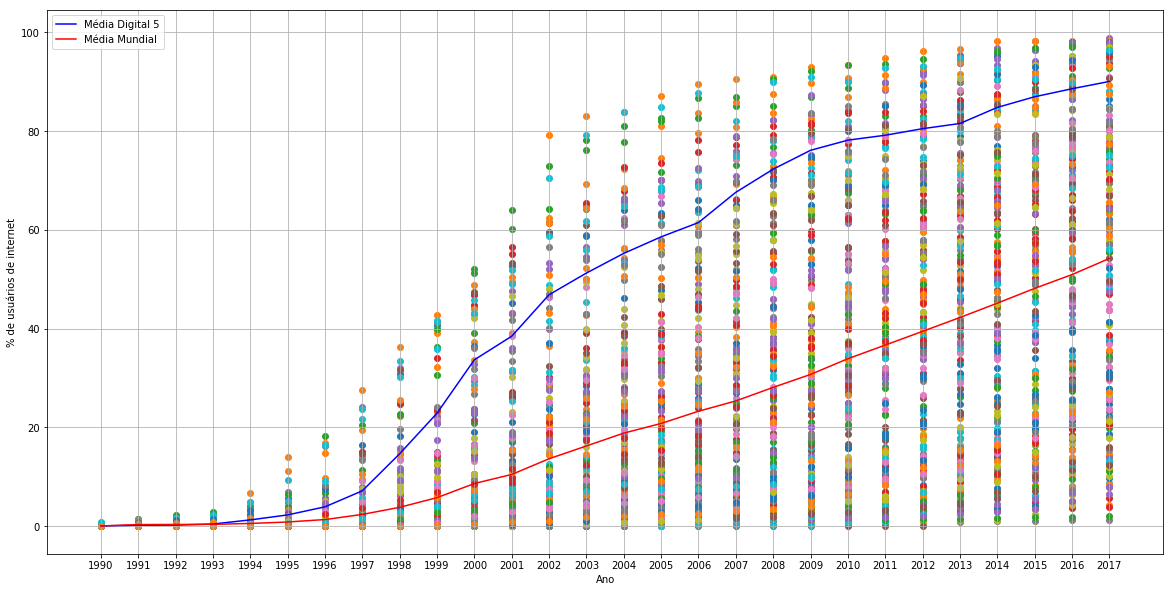

In [143]:
internet_users_v2_mean = internet_users_v2.mean()
plt.figure(figsize=(20,10))

internet_users_digital_5_v2_mean = internet_users_digital_5_v2.mean()

plt.plot(internet_users_digital_5_v2_mean.index,  internet_users_digital_5_v2_mean, color="b", label="Média Digital 5")
plt.plot(internet_users_v2_mean.index,  internet_users_v2_mean, color="r", label="Média Mundial")

plt.legend()

for pais in internet_users_v2_T.columns:
    plt.scatter(x=internet_users_v2_T.index, y=internet_users_v2_T[pais])
    
plt.xlabel("Ano")
plt.ylabel("% de usuários de internet")

plt.grid(True)
plt.show()

### Análise

Em azul temos a média de usuários de internet do Digital 5 e em vermelho a média Mundial.
Pode-se notar que muito antes do Digital 5 ser formado os países membros já tinham uma porcentagem maior de sua população com acesso à internet.

# Gasto em Educação

In [131]:
gov_exp_education_v2_anos = gov_exp_education_v2.loc[:,('1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018')]

gov_exp_education_v2_T = gov_exp_education_v2.T

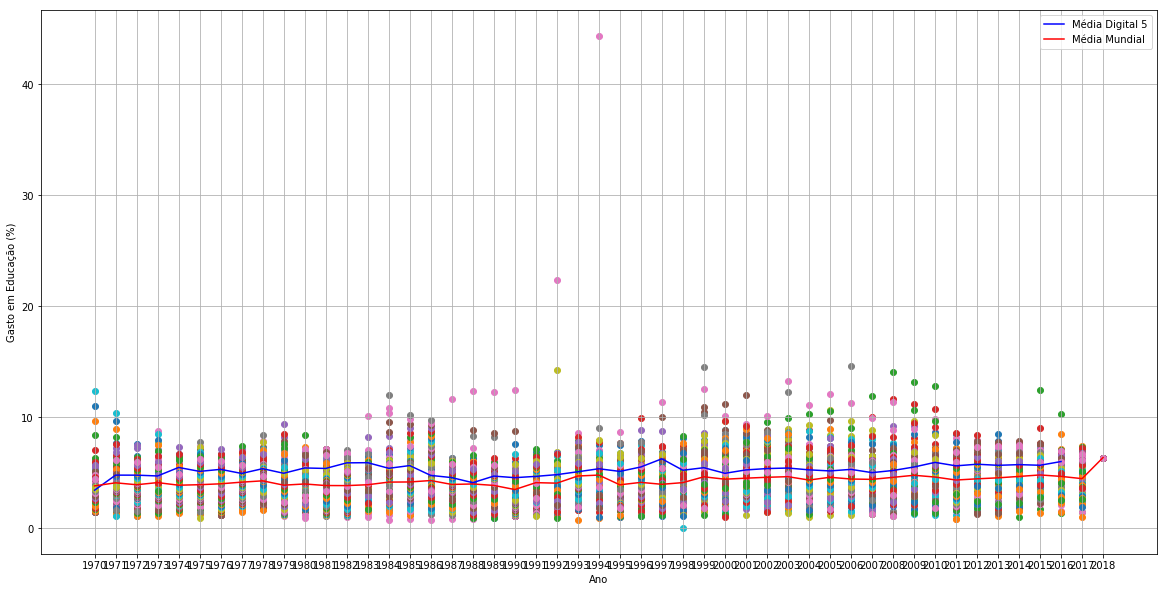

In [144]:
gov_exp_education_v2_mean = gov_exp_education_v2.mean()
plt.figure(figsize=(20,10))

gov_exp_education_digital_5_v2_mean = gov_exp_education_digital_5_v2.mean()

plt.plot(gov_exp_education_digital_5_v2_mean.index,  gov_exp_education_digital_5_v2_mean, color="b", label="Média Digital 5")
plt.plot(gov_exp_education_v2_mean.index,  gov_exp_education_v2_mean, color="r", label="Média Mundial")

plt.legend()

for pais in gov_exp_education_v2_T.columns:
    plt.scatter(x=gov_exp_education_v2_T.index, y=gov_exp_education_v2_T[pais])
    
plt.xlabel("Ano")
plt.ylabel("Gasto em Educação (%)")

plt.grid(True)
plt.show()

Em azul temos a média de usuários de internet do Digital 5 e em vermelho a média Mundial.
Pode-se notar que muito antes do Digital 5 ser formado os países membros já investiam uma porcentagem maior de sua verba em educação.

# Comparação Digital 5

## Número de pessoas usando a Internet

Comparação entre o ano de criação do Digital 5 e 2017, visando verificar se a criação da organização levou à um aumento significativo de usuários de internet nos países membros do Digital 5.

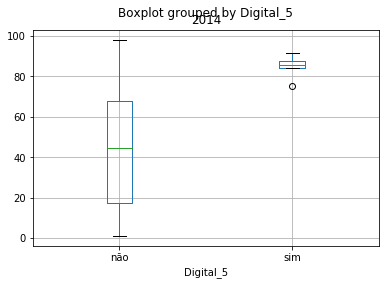

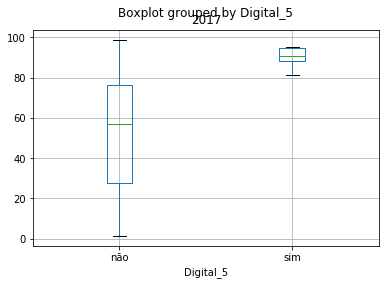

In [146]:
internet_users_v2.loc[:,"Digital_5"] = "não"
internet_users_v2.loc[digital_5, "Digital_5"] = "sim"
internet_users_v2.boxplot(column="2014", by="Digital_5")
internet_users_v2.boxplot(column="2017", by="Digital_5")

plt.show()

### Análise

A diferença entre 2014 e 2017 não é significativa

## Gasto em Educação

Comparação entre o ano de criação do Digital 5 e 2017, visando verificar se a criação da organização levou à um aumento significativo no gasto em educação nos países membros do Digital 5.

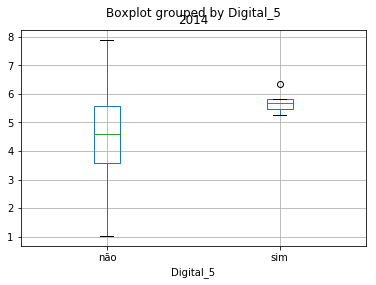

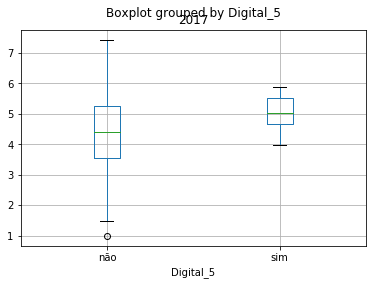

In [147]:
gov_exp_education_v2.loc[:,"Digital_5"] = "não"
gov_exp_education_v2.loc[digital_5, "Digital_5"] = "sim"
gov_exp_education_v2.boxplot(column="2014", by="Digital_5")
gov_exp_education_v2.boxplot(column="2017", by="Digital_5")

plt.show()

### Análise

A diferença entre 2014 e 2017 não é significativa

## Conclusão

Com base nos dados aqui apresentados pode-se concluir que os países membros do Digital 5 não tiveram aumentos notáveis tanto em usuários de internet quanto em gasto em educação, o aumento existente é mais próximo ao aumento normal desses países